# Practice problems 6
### Juan Sebastián Hernández Reyes - Machine learning 2021-1



## Punto 1
Build and train a keras sequential model to classify digits form the mnist dataset. The model must have a hidden dense layer of 128 neurons with a relu activation function.

In [123]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [41]:
#Import mnist dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

X_valid = X_train[-10000:]
y_valid = y_train[-10000:]

X_train = X_train[0:40000]
y_train = y_train[0:40000]

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))

Image Shape: (28, 28)

Training Set:   40000 samples
Validation Set: 10000 samples
Test Set:       10000 samples


In [42]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

#Normalization
X_trainN=X_train / 255.0
X_validN=X_valid/ 255.0
X_testN=X_test/ 255.0

print(X_trainN.shape)

(40000, 28, 28)


4


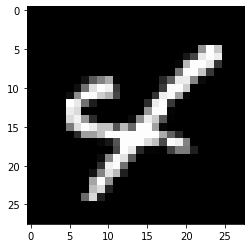

In [43]:
plt.imshow(X_trainN[0],cmap="gray")
print(y_train[0])

In [114]:
tf.keras.backend.clear_session()

model1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)],name='punto1')

model1.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [115]:
history = model1.fit(X_trainN, y_train, epochs=5,validation_data=(X_validN, y_valid))

Epoch 1/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.5001 - accuracy: 0.8633 - val_loss: 0.1542 - val_accuracy: 0.9587
Epoch 2/5
1250/1250 [==============================] - 3s 3ms/step - loss: 0.1386 - accuracy: 0.9594 - val_loss: 0.1191 - val_accuracy: 0.9660
Epoch 3/5
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0897 - accuracy: 0.9741 - val_loss: 0.0986 - val_accuracy: 0.9712
Epoch 4/5
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0653 - accuracy: 0.9819 - val_loss: 0.1021 - val_accuracy: 0.9683
Epoch 5/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0467 - accuracy: 0.9862 - val_loss: 0.0906 - val_accuracy: 0.9741


In [117]:
model1.summary()

Model: "punto1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [118]:
model1.evaluate(X_testN, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0872 - accuracy: 0.9740


[0.08717860281467438, 0.9739999771118164]

## Punto 2

Now build and train a keras functional model for the same problem. The model must have a hidden dense layer of 128 neurons with an activation function defined by the following function

$$activation(x)  =  
   \begin{cases}
    0 & \text{if } x<0 \\ sin(x-\pi/2)+1 & \text{if } 0\leq x\leq \pi/2 \\ x & \text{if } x>\pi/2
  \end{cases}$$

In [137]:
inputs = keras.Input(shape=(28, 28, 1))
flat = tf.keras.layers.Flatten()
dense = tf.keras.layers.Dense(128, activation = customactivation)

x = flat(inputs)
x = dense(x)

outputs = tf.keras.layers.Dense(10, activation = 'softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="punto2")
model.summary()

Model: "punto2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [136]:
from keras import backend as K
def customactivation(x):
  return K.switch(K.less(x,0),
                  x*0, 
                  K.switch(K.less_equal(x,np.pi/2),
                           K.sin(x-K.constant(np.pi/2))+tf.ones_like(x),
                           x))

In [106]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = model.fit(X_trainN, y_train, epochs=10,validation_data=(X_validN, y_valid))

Epoch 1/5
1250/1250 [==============================] - 5s 3ms/step - loss: 0.6241 - accuracy: 0.8059 - val_loss: 0.1646 - val_accuracy: 0.9534
Epoch 2/5
1250/1250 [==============================] - 3s 3ms/step - loss: 0.1524 - accuracy: 0.9546 - val_loss: 0.1350 - val_accuracy: 0.9604
Epoch 3/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1061 - accuracy: 0.9673 - val_loss: 0.1243 - val_accuracy: 0.9662
Epoch 4/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0757 - accuracy: 0.9768 - val_loss: 0.1144 - val_accuracy: 0.9662
Epoch 5/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0571 - accuracy: 0.9824 - val_loss: 0.1163 - val_accuracy: 0.9677


In [109]:
model.evaluate(X_testN, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1081 - accuracy: 0.9679


[0.10807834565639496, 0.9678999781608582]